### DBR Performance for Repeated Applications of Product Formulas 

In [1]:
from gci_functions_1 import *

In [2]:
from simple_exact_diagonalization_routines.local_matrix_class import *
from scipy.linalg import expm
import matplotlib.pyplot as plt

# System size
L = 9

# Create objects of Pauli operators
X = X_class(L)
Y = Y_class(L)
Z = Z_class(L)
S_plus = S_plus_class(L)
S_minus = S_minus_class(L)

# Trivial initialization of the right size matrix
H_TFIM = 0*np.eye( 2**L ) 

for x in range(L-1):
    H_TFIM = H_TFIM + 2*X.at(x+1).dot(X.at(x+2)) + Z.at(x+1)
H_TFIM = H_TFIM + Z.at(L)    

# Trivial initialization of the right size matrix
hamiltonian_name = "TLFIM_L_" +str(L)
H_TLFIM = 0*np.eye( 2**L ) 

for x in range(L-1):
    H_TLFIM = H_TLFIM + 2*X.at(x+1).dot(X.at(x+2)) + Z.at(x+1)+ X.at(x+1)
H_TLFIM = H_TLFIM + Z.at(L)    + X.at(L)


In [3]:
sigma_H0 = np.linalg.norm(H_TFIM - np.diag(np.diag(H_TFIM)))
print(sigma_H0)

128.0


In [4]:
s_list_dbr_1, sigma_norm_1 = multiple_rotations(H_TFIM, 0, 0.12, 100, 1, order=3)
s_list_dbr_2, sigma_norm_2 = multiple_rotations(H_TFIM, 0, 0.12, 100,2 , order=3)
s_list_dbr_4, sigma_norm_4 = multiple_rotations(H_TFIM, 0, 0.12, 100,4 , order=3)
s_list_dbr_exact, sigma_norm_exact = multiple_rotations(H_TFIM, 0, 0.12, 100,1 , order=0)

(100,)
[128.0, 126.74976207548637, 125.483872031344, 124.20587224574139, 122.91922415089414, 121.62730225147418, 120.33338862953646, 119.04066820436677, 117.75222305652561, 116.47102933577949, 115.19995253345489, 113.9417438933477, 112.69903691745263, 111.47434411308355, 110.27005396292549, 109.08842811605255, 107.93159880119879, 106.80156649102952, 105.70019771781472, 104.62922331962683, 103.59023682114598, 102.58469320024959, 101.61390798826982, 100.67905675022685, 99.781174979115, 98.92115843781517, 98.09976398031282, 97.31761088061005, 96.57518269305301, 95.87282966184382, 95.21077169040905, 94.58910187324533, 94.00779058410521, 93.4666901051955, 92.96553977274637, 92.5039716051868, 92.08151637155045, 91.69761004992385, 91.35160061900928, 91.04275512041482, 90.7702669252757, 90.53326313634716, 90.33081205583245, 90.1619306498878, 90.02559194290009, 89.92073240408288, 89.84625847953248, 89.80105425946763, 89.78398742319769, 89.7939155880016, 89.8296921418546, 89.89017168526443, 89.9

Text(0.5, 1.0, 'order = 3, repeat = 1,2,4')

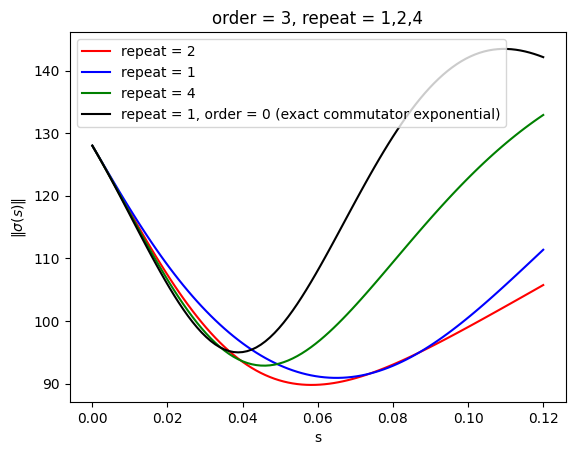

In [5]:
print(np.shape(s_list_dbr_2))
print(sigma_norm_2)
plt.plot(s_list_dbr_2,sigma_norm_2,color = 'red',label = "repeat = 2")
plt.plot(s_list_dbr_2,sigma_norm_1, color = 'blue', label  = "repeat = 1") 
plt.plot(s_list_dbr_2,sigma_norm_4 , color = 'green', label = "repeat = 4")
plt.plot(s_list_dbr_2,sigma_norm_exact , color = 'black', label = "repeat = 1, order = 0 (exact commutator exponential)")

plt.legend()
plt.ylabel("$\|\sigma(s)\|$")  
plt.xlabel("s") 
plt.title("order = 3, repeat = 1,2,4")  

We see that for 

In [6]:
s_list_dbr_0, sigma_norm_0 = multiple_rotations(H_TFIM, 0, 0.12, 100, 2, order=2)
s_list_dbr_0_A, sigma_norm_0_A = multiple_rotations(H_TFIM, 0, 0.12, 100, 1, order=2)
s_list_dbr_0_B, sigma_norm_0_B = multiple_rotations(H_TFIM, 0, 0.12, 100, 4, order=2)

In [7]:
print(np.min(sigma_norm_0_A))

115.73067280939412


(100,)
[128.0, 126.74976207548637, 125.483872031344, 124.20587224574139, 122.91922415089414, 121.62730225147418, 120.33338862953646, 119.04066820436677, 117.75222305652561, 116.47102933577949, 115.19995253345489, 113.9417438933477, 112.69903691745263, 111.47434411308355, 110.27005396292549, 109.08842811605255, 107.93159880119879, 106.80156649102952, 105.70019771781472, 104.62922331962683, 103.59023682114598, 102.58469320024959, 101.61390798826982, 100.67905675022685, 99.781174979115, 98.92115843781517, 98.09976398031282, 97.31761088061005, 96.57518269305301, 95.87282966184382, 95.21077169040905, 94.58910187324533, 94.00779058410521, 93.4666901051955, 92.96553977274637, 92.5039716051868, 92.08151637155045, 91.69761004992385, 91.35160061900928, 91.04275512041482, 90.7702669252757, 90.53326313634716, 90.33081205583245, 90.1619306498878, 90.02559194290009, 89.92073240408288, 89.84625847953248, 89.80105425946763, 89.78398742319769, 89.7939155880016, 89.8296921418546, 89.89017168526443, 89.9

Text(0.5, 1.0, 'order = 2, repeat = 1,2,4')

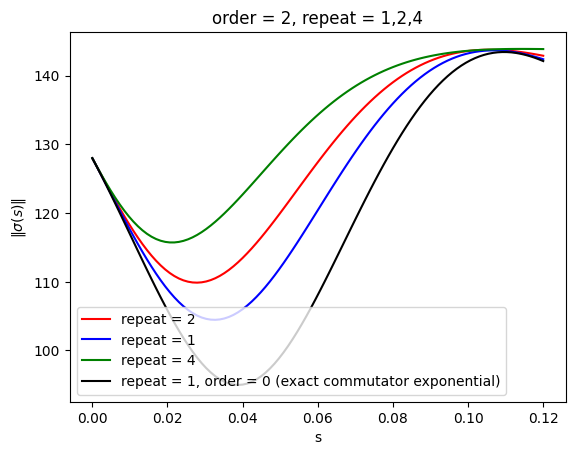

In [8]:
print(np.shape(s_list_dbr_2))
print(sigma_norm_2)
plt.plot(s_list_dbr_0,sigma_norm_0,color = 'red',label = "repeat = 2")
plt.plot(s_list_dbr_0,sigma_norm_0_B, color = 'blue', label  = "repeat = 1") 
plt.plot(s_list_dbr_0,sigma_norm_0_A , color = 'green', label = "repeat = 4")
plt.plot(s_list_dbr_0,sigma_norm_exact , color = 'black', label = "repeat = 1, order = 0 (exact commutator exponential)")

plt.legend()
plt.ylabel("$\|\sigma(s)\|$")  
plt.xlabel("s") 
plt.title("order = 2, repeat = 1,2,4")  


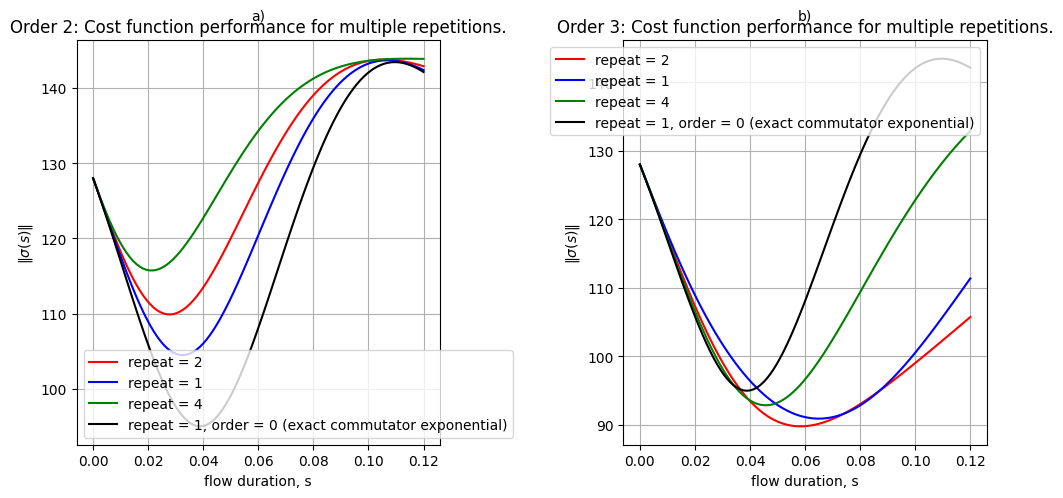

In [11]:

import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot data on the first subplot
ax1.plot(s_list_dbr_0, sigma_norm_0, color='red', label="repeat = 2")
ax1.plot(s_list_dbr_0, sigma_norm_0_B, color='blue', label="repeat = 1")
ax1.plot(s_list_dbr_0, sigma_norm_0_A, color='green', label="repeat = 4")
ax1.plot(s_list_dbr_0, sigma_norm_exact, color='black', label="repeat = 1, order = 0 (exact commutator exponential)")
ax1.set_title('Order 2: Cost function performance for multiple repetitions.')
ax1.set_xlabel('flow duration, s')
ax1.set_ylabel('$\|\sigma(s)\|$')
ax1.grid(True)
ax1.legend()

# Plot data on the second subplot
ax2.plot(s_list_dbr_2, sigma_norm_2, color='red', label="repeat = 2")
ax2.plot(s_list_dbr_2, sigma_norm_1, color='blue', label="repeat = 1")
ax2.plot(s_list_dbr_2, sigma_norm_4, color='green', label="repeat = 4")
ax2.plot(s_list_dbr_2, sigma_norm_exact, color='black', label="repeat = 1, order = 0 (exact commutator exponential)")
ax2.set_title('Order 2: Cost function performance for multiple repetitions.')
ax2.set_xlabel('flow duration, s')
ax2.set_ylabel('$\|\sigma(s)\|$')
ax2.grid(True)
ax2.legend()

# Adjust layout to prevent overlapping titles and legends
plt.tight_layout()

# Label the subplots
ax1.text(0.5, 1.05, 'a)', transform=ax1.transAxes, ha='center')
ax2.text(0.5, 1.05, 'b)', transform=ax2.transAxes, ha='center')

plt.show()

